# Geodesics in anti-de Sitter spacetime

This worksheet aims at recovering some geodesics of anti-de Sitter (AdS) spacetime using numerical tools implemented in the SageMath class **IntegratedGeodesic**.

*NB:* a version of SageMath at least equal to 8.1 is required to run this worksheet:

In [1]:
version()

'SageMath version 8.1.beta2, Release Date: 2017-08-13'

First set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

## Anti-de Sitter manifold

To set AdS spacetime, declare a 4-dimensional differentiable manifold and a non-negative parameter $b$:

In [3]:
AdS = Manifold(4, 'AdS', r'\mathcal{Schw}')
b = var('b') ; assume(b > 0)

Define the hyperbolic coordinates:

In [4]:
Hyp.<ta,rh,th,ph> = AdS.chart(r'ta:\tau rh:(0,+oo):\rho th:(0,pi):\theta ph:(0,2*pi):\phi')

Finally set the Lorentzian metric of Ads spacetime:

In [5]:
g = AdS.lorentzian_metric('g')
g[0,0], g[1,1] = -cosh(rh)^2, b^(-2)
g[2,2], g[3,3] = b^(-2)*sinh(rh)^2, b^(-2)*sinh(rh)^2*sin(th)^2
g.display()

g = -cosh(rh)^2 dta*dta + b^(-2) drh*drh + sinh(rh)^2/b^2 dth*dth + sin(th)^2*sinh(rh)^2/b^2 dph*dph

## Geodesics of AdS spacetime

### Defining an affinely parametrised geodesic

Declare the various variables needed to define a geodesic; start with the affine parameter and its extremal values:

In [6]:
affine_param = var('s s_0 s_max')

Then, declare the starting point of the geodesic:

In [7]:
initial_pt_coords = var('ta_0 rh_0 th_0 ph_0')
p_0 = AdS.point(initial_pt_coords, name='p_0')

Declare the initial tangent vector:

In [8]:
initial_tgt_vec_comps = var('Dta_0 Drh_0 Dth_0 Dph_0')
v_0 = AdS.tangent_space(p_0)(initial_tgt_vec_comps)

The parametrised geodesic may now be initialised:

In [9]:
geod = AdS.integrated_geodesic(g, affine_param, v_0, verbose=True)

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [Dph_0, Drh_0, Dta_0, Dth_0, b, ph_0, rh_0, s_0, s_max, ta_0, th_0].


Display the system of the affinely parametrised geodesic equations:

In [10]:
sys = geod.system(verbose=True)

Geodesic in the 4-dimensional differentiable manifold AdS equipped with Lorentzian metric g on the 4-dimensional differentiable manifold AdS, and integrated over the Real interval (s_0, s_max) as a solution to the following geodesic equations, written with respect to Chart (AdS, (ta, rh, th, ph)):

Initial point: Point p_0 on the 4-dimensional differentiable manifold AdS with coordinates [ta_0, rh_0, th_0, ph_0] with respect to Chart (AdS, (ta, rh, th, ph))
Initial tangent vector: Tangent vector at Point p_0 on the 4-dimensional differentiable manifold AdS with components [Dta_0, Drh_0, Dth_0, Dph_0] with respect to Chart (AdS, (ta, rh, th, ph))

d(ta)/ds = Dta
d(rh)/ds = Drh
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dta)/ds = -2*Drh*Dta*sinh(rh)/cosh(rh)
d(Drh)/ds = -Dph^2*cos(th)^2*cosh(rh)*sinh(rh) - (Dta^2*b^2 - Dph^2 - Dth^2)*cosh(rh)*sinh(rh)
d(Dth)/ds = (Dph^2*cos(th)*sin(th)*sinh(rh) - 2*Drh*Dth*cosh(rh))/sinh(rh)
d(Dph)/ds = -2*(Dph*Drh*cosh(rh)*sin(th) + Dph*Dth*cos(th)*sinh(rh))/(sin(

### Computing and plotting the geodesic

#### Null radial geodesic

Set a dictionnary providing numerical values for each of the parameters apprearing in the system defining the geodesic. 

The values suggested below make the initial tangent vector null and radial.

In [11]:
params_values_null_radial = {b:1, s_0:0, s_max:15, ta_0:0, rh_0:0.1, th_0:pi/3, ph_0:pi/4, 
                         Dta_0:1/cosh(0.1), Drh_0:1, Dth_0:0, Dph_0:0}

Then integrate the geodesic for such values of the parameters:

In [12]:
sol_null_radial = geod.solve(step=0.1, parameters_values=params_values_null_radial, 
                           solution_key='null_radial', verbose=True)

Performing 4th order Runge-Kutta integration with Maxima by default...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'null_radial' (if this key already referred to a former numerical solution, such a solution was erased).


Analytic expressions of null geodesics in AdS being known, these may be used to check the previous numerical solution:

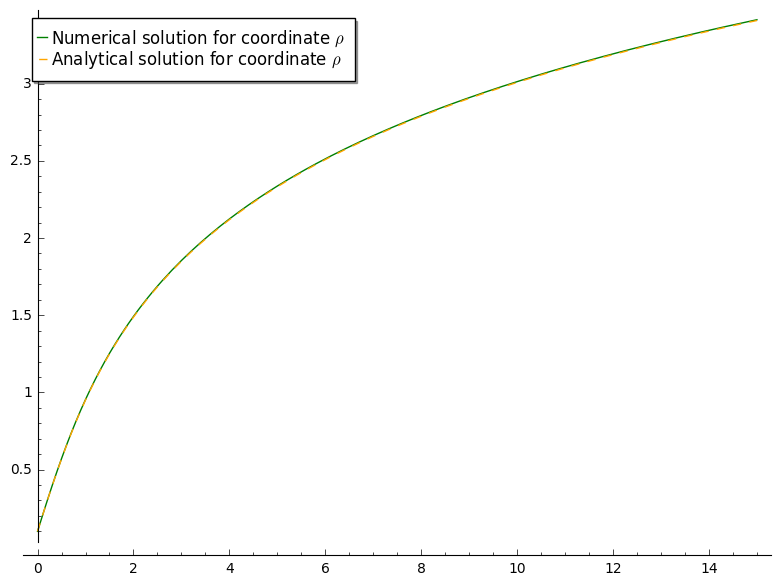

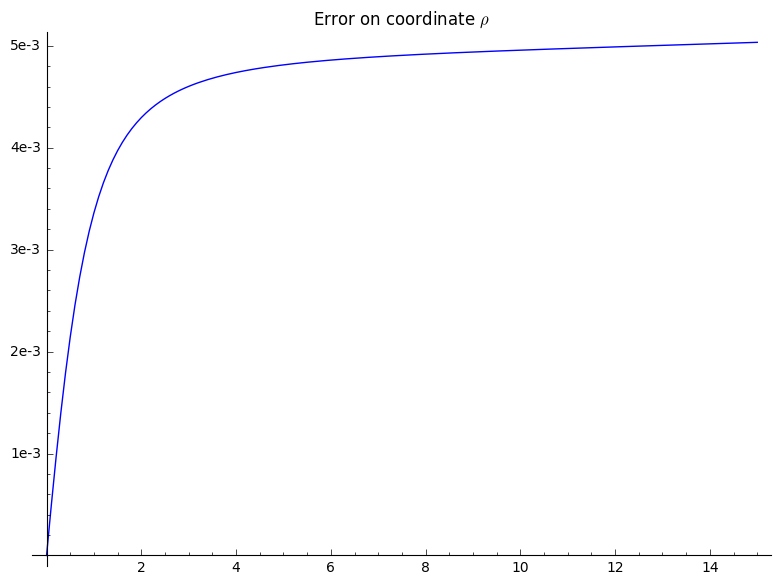

In [13]:
rh_num = []
rh_analyt = []
rh_error = []

for (S,TA,RH,TH,PH) in sol_null_radial:
    rh_num += [(S,RH)]
    rh_analyt += [(S, arcsinh(S + sinh(0.1)))]
    rh_error += [(S, RH - arcsinh(S + sinh(0.1)))]

plot_rh_num = line(rh_num, legend_label=r'Numerical solution for coordinate $\rho$', color='green')
plot_rh_analyt = line(rh_analyt, color='orange', legend_label=r'Analytical solution for coordinate $\rho$', 
                      linestyle='--')
plot_rh_error = line(rh_error)

(plot_rh_num + plot_rh_analyt).show()
plot_rh_error.show(title=r'Error on coordinate $\rho$')

The following results provide another way to check the numerical integration.

The squared norm $g_{\mu\nu} \dot{x}^{\mu} \dot{x}^{\nu}$ of the vector tangent to any geodesic with respect to any affine parameter $s$ is constant throughout motion.

In addition, $\partial_{\tau}$ is an obvious Killing vector of AdS metric, so that quantity $e \equiv \cosh^{2}(\rho) \ \dot{\tau}$ is constant as well.

Therefore, using an interpolation of the previous numerical solution, one may check that these two quantities are conserved (not to be disturbed by initial edge effects, the reference values used to check conservations of the various quantities are updated after 10 steps):

Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'null_radial' (if this key already referred to a former interpolation, such an interpolation was erased).


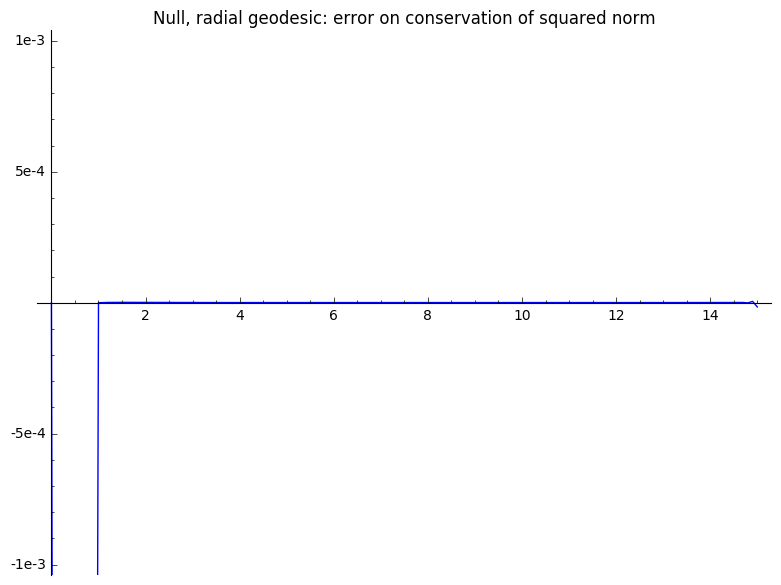

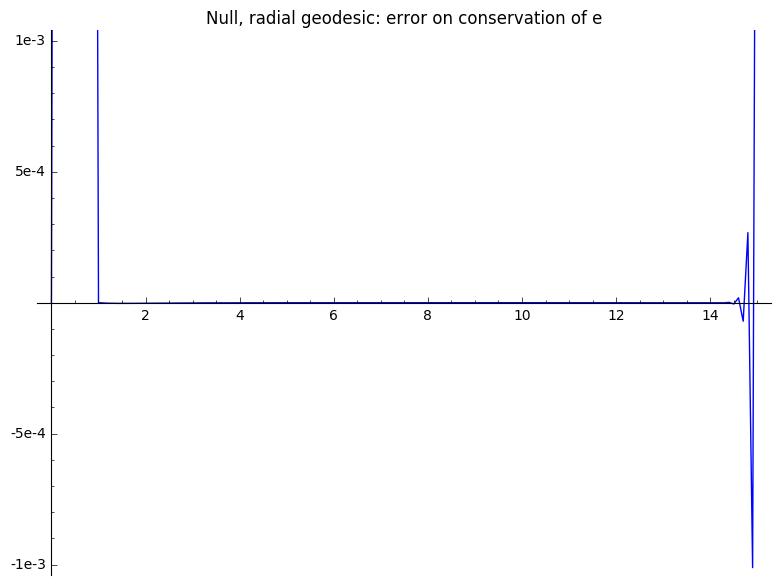

In [14]:
interp_null_radial = geod.interpolate(solution_key='null_radial', interpolation_key='null_radial', verbose=True)

error_squar_norm_null_radial = []
error_e_null_radial = []

i = 0
for (S,TA,RH,TH,PH) in sol_null_radial:
    P = geod(S, interpolation_key='null_radial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='null_radial')

    squar_norm_null_radial = numerical_approx((g.at(P)(V,V)).substitute({b:1}))
    e_null_radial = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({b:1}))
    
    if i == 0:
        squar_norm_null_radial_0 = squar_norm_null_radial
        e_null_radial_0 = e_null_radial
 
    if i == 10:
        squar_norm_null_radial_0 = squar_norm_null_radial
        e_null_radial_0 = e_null_radial

    error_squar_norm_null_radial += [(S,squar_norm_null_radial - squar_norm_null_radial_0)]
    error_e_null_radial += [(S,e_null_radial - e_null_radial_0)]
    
    i += 1

plot_error_squar_norm_null_radial = line(error_squar_norm_null_radial)
plot_error_e_null_radial = line(error_e_null_radial)

plot_error_squar_norm_null_radial.show(title="Null, radial geodesic: error on conservation of squared norm",
                                        ymin=-1e-3, ymax=1e-3)
plot_error_e_null_radial.show(title="Null, radial geodesic: error on conservation of e", 
                              ymin=-1e-3, ymax=1e-3)

One may finally plot the time coordinate of the geodesic with respect to radial coordinate:

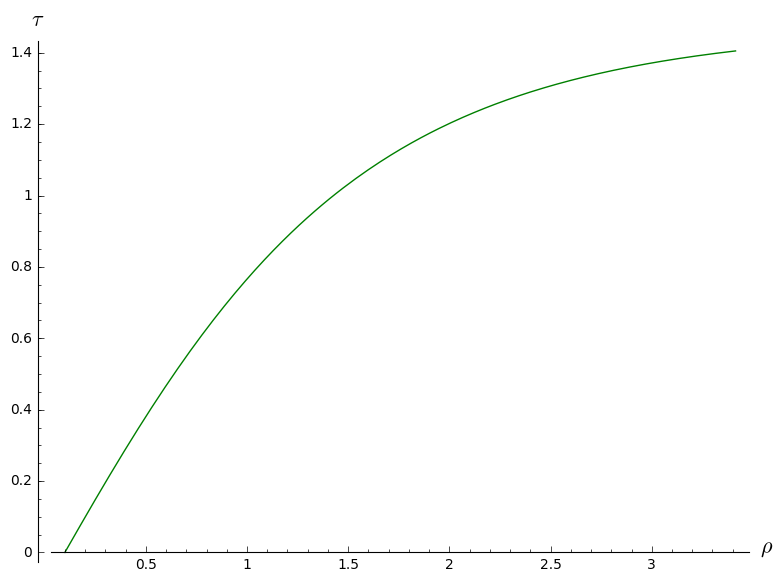

In [15]:
geod.plot_integrated(interpolation_key='null_radial', ambient_coords=(rh,ta), plot_points=200, color='green')

#### Timelike radial geodesic

Set a dictionnary providing numerical values for each of the parameters apprearing in the system defining the geodesic. 

The values suggested below make the initial tangent vector timelike and radial, with squared norm equal to -1, so that the curve parameter `s` is proper time along the (timelike) geodesic.

In [16]:
params_values_timelike_radial = {b:1, s_0:0, s_max:3, ta_0:0, rh_0:0.1, th_0:pi/3, ph_0:pi/4, 
                         Dta_0:sqrt(2)/cosh(0.1), Drh_0:1, Dth_0:0, Dph_0:0}

Integrate the geodesic for such values of the parameters:

In [17]:
sol_timelike_radial = geod.solve(step=0.01, parameters_values=params_values_timelike_radial, 
                           solution_key='timelike_radial', verbose=True)

Performing 4th order Runge-Kutta integration with Maxima by default...
Numerical integration completed.

Checking all points are in the chart domain...
All points are in the chart domain.

The resulting list of points was associated with the key 'timelike_radial' (if this key already referred to a former numerical solution, such a solution was erased).


Use the analytic solution to check the numerical integration:

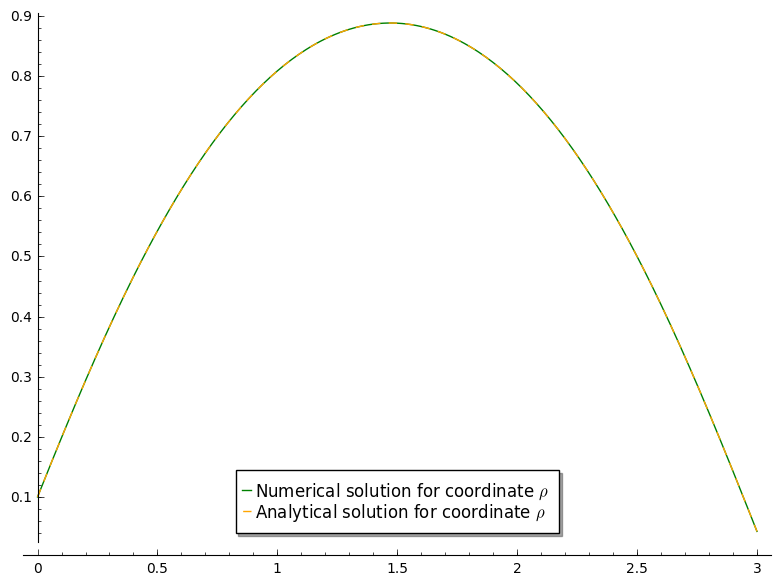

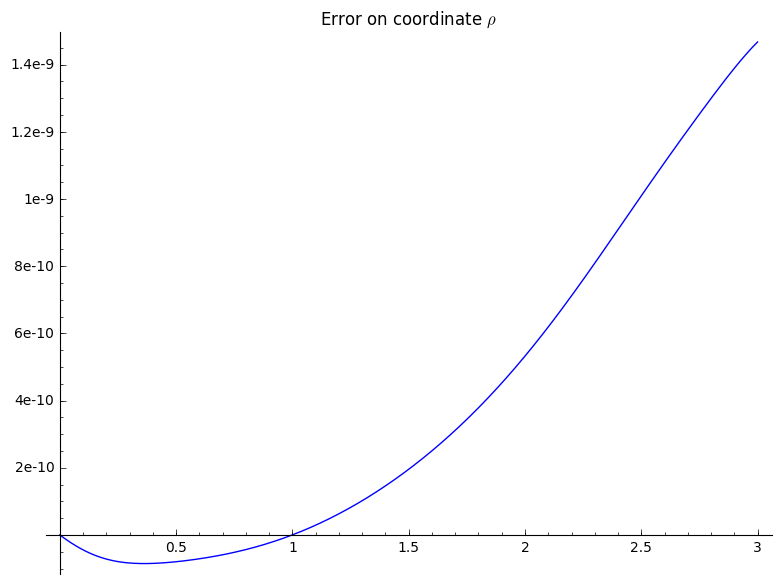

In [18]:
rh_num = []
rh_analyt = []
rh_error = []

for (S,TA,RH,TH,PH) in sol_timelike_radial:
    rh_num += [(S,RH)]
    rh_analyt += [(S, arcsinh(sinh(0.1)*cos(S) + cosh(0.1)*sin(S)))]
    rh_error += [(S, RH - arcsinh(sinh(0.1)*cos(S) + cosh(0.1)*sin(S)))]

plot_rh_num = line(rh_num, legend_label=r'Numerical solution for coordinate $\rho$', color='green')
plot_rh_analyt = line(rh_analyt, color='orange', legend_label=r'Analytical solution for coordinate $\rho$', 
                      linestyle='--')
plot_rh_error = line(rh_error)

(plot_rh_num + plot_rh_analyt).show()
plot_rh_error.show(title=r'Error on coordinate $\rho$')

Interpolate the solution to check conservation of norm and quantity $e$, and plot the solution:

Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'timelike_radial' (if this key already referred to a former interpolation, such an interpolation was erased).


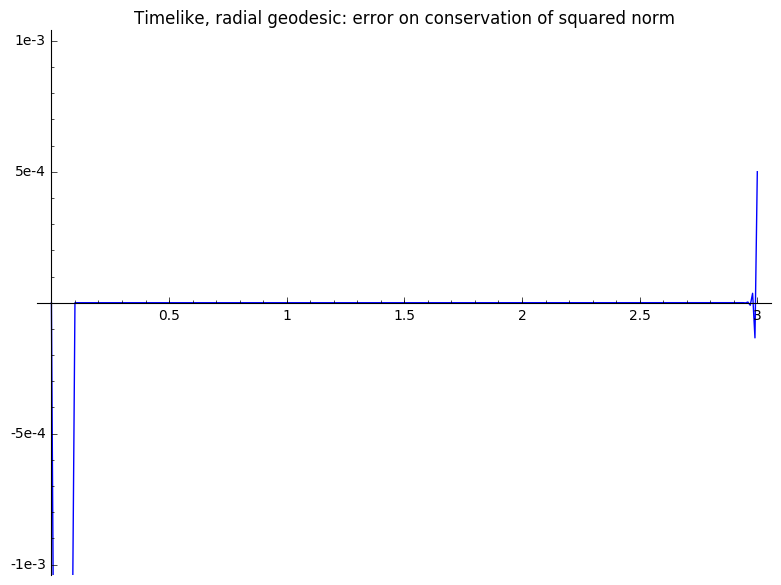

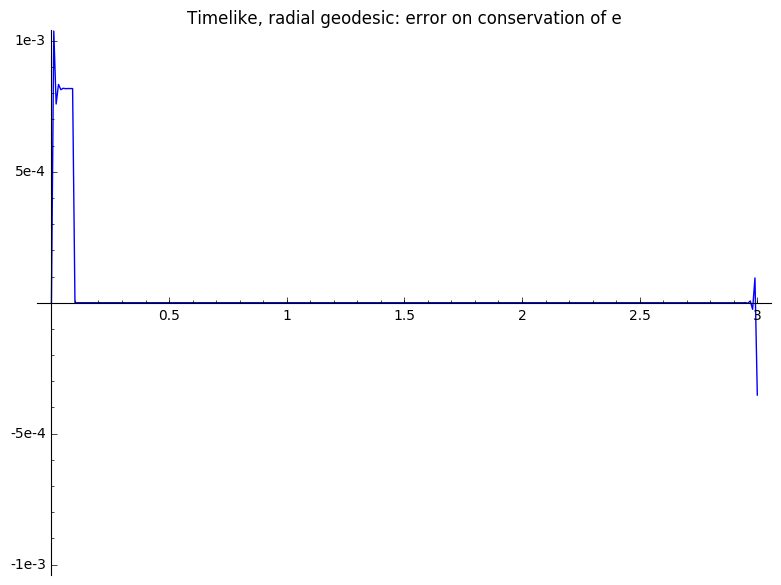

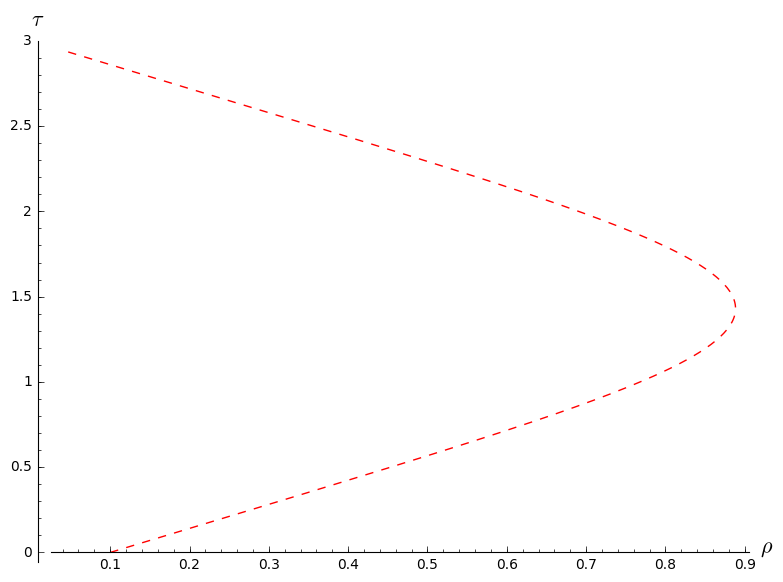

In [19]:
interp_timelike_radial = geod.interpolate(solution_key='timelike_radial', interpolation_key='timelike_radial', 
                                          verbose=True)

error_squar_norm_timelike_radial = []
error_e_timelike_radial = []

i = 0
for (S,TA,RH,TH,PH) in sol_timelike_radial:
    P = geod(S, interpolation_key='timelike_radial')
    V = geod.tangent_vector_eval_at(S, interpolation_key='timelike_radial')

    squar_norm_timelike_radial = numerical_approx((g.at(P)(V,V)).substitute({b:1}))
    e_timelike_radial = numerical_approx((-g.at(P)[0,0]*V[0]).substitute({b:1}))
    
    if i == 0:
        squar_norm_timelike_radial_0 = squar_norm_timelike_radial
        e_timelike_radial_0 = e_timelike_radial
 
    if i == 10:
        squar_norm_timelike_radial_0 = squar_norm_timelike_radial
        e_timelike_radial_0 = e_timelike_radial

    error_squar_norm_timelike_radial += [(S,squar_norm_timelike_radial - squar_norm_timelike_radial_0)]
    error_e_timelike_radial += [(S,e_timelike_radial - e_timelike_radial_0)]
    
    i += 1

plot_error_squar_norm_timelike_radial = line(error_squar_norm_timelike_radial)
plot_error_e_timelike_radial = line(error_e_timelike_radial)

plot_error_squar_norm_timelike_radial.show(title="Timelike, radial geodesic: error on conservation of squared norm",
                                           ymin=-1e-3, ymax=1e-3)
plot_error_e_timelike_radial.show(title="Timelike, radial geodesic: error on conservation of e", 
                                  ymin=-1e-3, ymax=1e-3)

geod.plot_integrated(interpolation_key='timelike_radial', ambient_coords=(rh,ta), plot_points=200, style='--')

One may thus plot a grid of null and timelike radial geodesics in AdS spacetime:

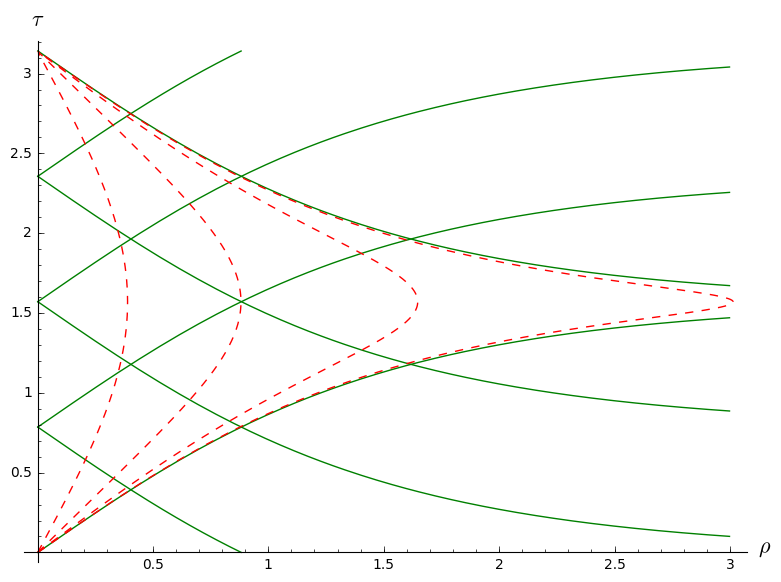

In [20]:
S_MAX_NULL = [10, 10, 10, 1]
TH_0_NULL = [0, pi/4, pi/2, 3*pi/4]

grid = Graphics()

for (S_MAX,TH_0) in zip(S_MAX_NULL,TH_0_NULL):
    params_values_null_radial = {b:1, s_0:0, s_max:S_MAX, ta_0:TH_0, rh_0:1e-3, th_0:pi/3, ph_0:pi/4, 
                                     Dta_0:1/cosh(1e-3), Drh_0:1, Dth_0:0, Dph_0:0}


    sol_null_radial = geod.solve(step=S_MAX/100, parameters_values=params_values_null_radial, 
                               solution_key='null_radial-{}'.format(TH_0))

    interp_null_radial = geod.interpolate(solution_key='null_radial-{}'.format(TH_0),
                                              interpolation_key='null_radial-{}'.format(TH_0))

    grid += geod.plot_integrated(interpolation_key='null_radial-{}'.format(TH_0), ambient_coords=(rh,ta), 
                                 plot_points=200, color='green')

S_MAX_NULL_BACK = [1, 10, 10, 10]
TH_0_NULL_BACK = [pi/4, pi/2, 3*pi/4, pi]

for (S_MAX,TH_0) in zip(S_MAX_NULL_BACK,TH_0_NULL_BACK):
    params_values_null_radial_back = {b:1, s_0:0, s_max:S_MAX, ta_0:TH_0, rh_0:1e-3, th_0:pi/3, ph_0:pi/4, 
                                     Dta_0:-1/cosh(1e-3), Drh_0:1, Dth_0:0, Dph_0:0}


    sol_null_radial = geod.solve(step=S_MAX/100, parameters_values=params_values_null_radial_back, 
                               solution_key='null_radial_back-{}'.format(TH_0))

    interp_null_radial = geod.interpolate(solution_key='null_radial_back-{}'.format(TH_0),
                                              interpolation_key='null_radial_back-{}'.format(TH_0))

    grid += geod.plot_integrated(interpolation_key='null_radial_back-{}'.format(TH_0), ambient_coords=(rh,ta), 
                                 plot_points=200, color='green')

S_MAX_TIMELIKE = [3.13, 3.14, 3.14, 3.19]
DRH_0_TIMELIKE = [0.4, 1, 2.5, 10]

for (S_MAX,DRH_0) in zip(S_MAX_TIMELIKE,DRH_0_TIMELIKE):
    params_values_timelike_radial = {b:1, s_0:0, s_max:S_MAX, ta_0:0, rh_0:1e-3, th_0:pi/3, ph_0:pi/4, 
                                     Dta_0:sqrt(DRH_0^2 + 1)/cosh(1e-3), Drh_0:DRH_0, Dth_0:0, Dph_0:0}


    sol_timelike_radial = geod.solve(step=S_MAX/100, parameters_values=params_values_timelike_radial, 
                               solution_key='timelike_radial-{}'.format(DRH_0))

    interp_timelike_radial = geod.interpolate(solution_key='timelike_radial-{}'.format(DRH_0),
                                              interpolation_key='timelike_radial-{}'.format(DRH_0))

    grid += geod.plot_integrated(interpolation_key='timelike_radial-{}'.format(DRH_0), ambient_coords=(rh,ta), 
                                 plot_points=200, style='--')

grid.show()